## Steps for running a simple optimization.

### Step 0: Prepare the input file template

Replace the to-be-optimized value in the input template file with `<name>`.
```
    File_Bfield(1) = 'sole_gun.dat', S_pos(1) = 0.28
    S_smooth(1) = 5  
    MaxB(1) = <main_sole_b>
```

### Step 1: Assign system path and import modules

In [1]:
from linacopt import LinacOpt

Error: IPOPT shared library failed to import


### Step 2: Instantiate the optimization

In [2]:
opt_test = LinacOpt(path_name='examples/astra_basic', particle_type='astra', 
                    input_file='injector.in', input_template='injector.in.000')

### Step 3: Set up the optimizer

In [3]:
opt_test.set_optimizer('sdpen')
opt_test.optimizer.setOption('alfa_stop', 1e-2)

### Step 4: Set fit-points

In [4]:
opt_test.fit_points.set_point('out', 'injector.0400.001')

### Step 5: Set objective

In [5]:
def f1(fits):
    print("Horizontal emittance: {:.4f} um".format(fits.out.emitx*1.e6))
    return fits.out.emitx*1.e6
opt_test.opt_prob.set_obj('emitx_um', f1)

### Step 6: Set constraint

In [6]:
def g1(fits):
    return fits.out.n0
opt_test.opt_prob.set_con('npar', g1, equal=500)

### Step 7: Set variables


In [7]:
opt_test.opt_prob.set_var('laser_spot', value=0.1, lower=0.04, upper=0.3)
opt_test.opt_prob.set_var('main_sole_b', value=0.1, lower=0.0, upper=0.4)

### Step 8: Run the optimization


In [8]:
opt_test.solve('astra')


********************************************************************************
Start solving the following problem with pyOpt.SDPEN on 
astra /home/jun/Projects/linacopt/examples/astra_basic/injector.in
********************************************************************************

Optimization Problem -- opt_prob-2018-02-12-23-33-48

Objectives:
  Name                Value        Optimum      Function        
  emitx_um             0.0000e+00  -1.0000e+21  f1              

Constraints:
  Name                Value        Bound                                           
  npar                 0.0000e+00  5.0000e+02 - 0.0000e+00 <= g1() <= 5.0000e+02 + 0.0000e+00

Variables (c - continuous, i - integer, d - discrete):
  Name                Type    Value        Lower Bound  Upper Bound
  laser_spot          c        1.0000e-01   4.0000e-02   3.0000e-01
  main_sole_b         c        1.0000e-01   0.0000e+00   4.0000e-01
 
Fit points:
  Name                File              Type      

----
# Output

**General output:**
- prob_name.log.???: History of the optimization. ??? is the No. of step.
- prob_name.sol.???: Summary of the solution.
- prob_name.sol.???.pkl: Pickle file used for starting from a intermediate step.
- input_file: The input file will be filled with the optimized parameters.

**Output from specific optimizers:**
- ALPSO: ALPSO_print.out
- SDPEN: SDPEN.out.???

----
# Postprocessing

In [9]:
from linacopt import PhaseSpacePlot

# Instantiate a PhaseSpacePlot object
p1 = PhaseSpacePlot('injector.0400.001', 'astra')

## Print the parameters

In [10]:
print(p1)

cutTail = None, cutHalo = None, rotate = None

n                   charge (C)          p                   I_peak (A)      
      5.0000e+02          2.0000e-11          1.0020e+02          2.8223e+00

emitx (m)           emity (m)           Sx (m)              Sy (m)          
      1.5308e-07          1.5054e-07          7.9255e-05          7.9157e-05

betax (m)           betay (m)           alphax              alphay          
      4.1316e+00          4.1948e+00         -1.3701e+01         -1.3891e+01

St (s)              Sdelta              chirp (1/m)         Ct (s)          
      2.5284e-12          1.4734e-03         -4.6494e-01          7.0740e-24

emitx_slice (m)     emity_slice (m)     Sdelta_slice        dt_slice (s)    
      6.2078e-08          6.6849e-08          3.4689e-05          9.8903e-13

Cx (m)              Cy (m)              Cxp (rad)           Cyp (rad)       
     -3.0015e-07          4.6864e-07         -7.3668e-07          1.2474e-06

emitx_tr (m)        emi

In [11]:
p1.betax, p1.emitx_tr

(4.1315657779450907, 1.5233189615800903e-07)

## Phase-space plot

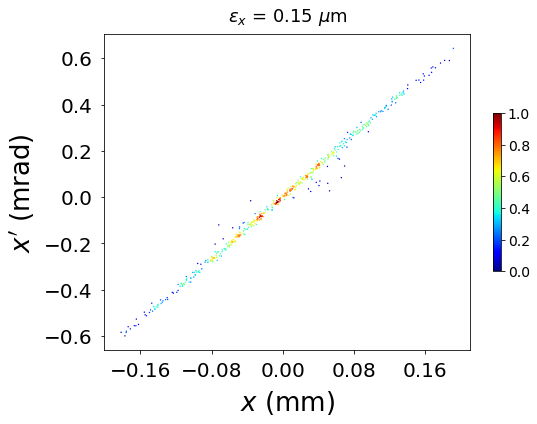

In [12]:
p1.plot('x', 'xp')

/home/jun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


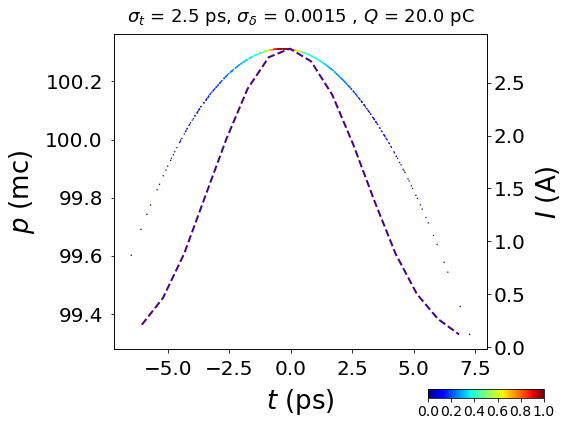

In [13]:
p1.plot('t', 'p', y1_unit='A', x_unit='ps', bins_2d=500, sigma_2d=5)

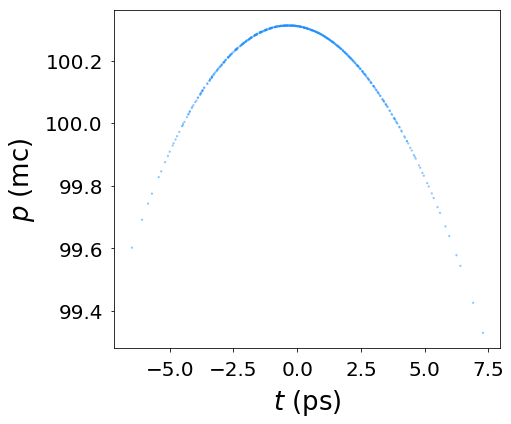

In [14]:
p1.plot('t', 'p', x_unit='ps', special=False, density_plot=False, 
        marker_color='dodgerblue', marker_size=5, alpha=0.5, figsize=(7.2, 6))

## Line plot

In [15]:
from linacopt import LinePlot

# Instantiate a PhaseSpacePlot object
l1 = LinePlot('injector', 'astra')

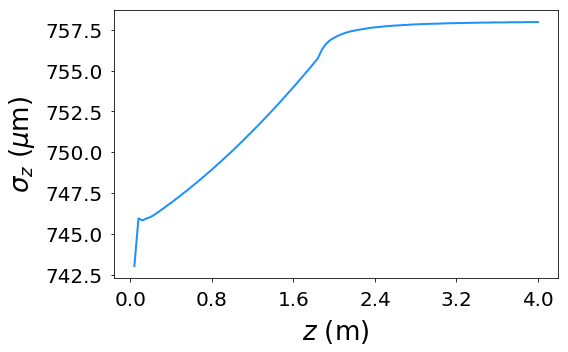

In [16]:
l1.plot('Sz')

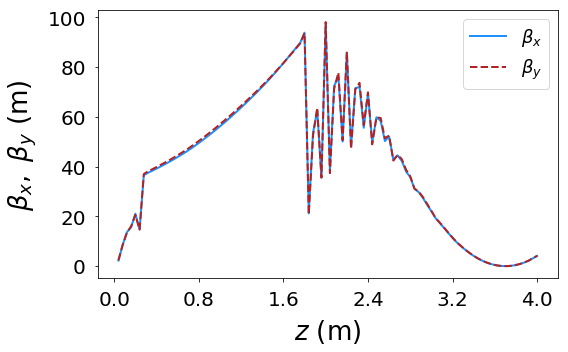

In [17]:
l1.plot(['betax', 'betay'])